# Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np

In [154]:
#Loading data
df = pd.read_excel("taxi_data.xlsx")
df.head()

,pickup_time,dropoff_time,trip_distance,pickup_longitude,pickup_latitude,rate_code,dropoff_longitude,dropoff_latitude,payment_type,trip_fare,tip_amount,toll_amount
0,2023-03-01 00:00:45,2023-03-01 00:39:48,18.34,-73.793167,40.656830,1,-73.793167,40.656830,2,58.34,0.00,0.00
1,2023-03-04 07:07:32,2023-03-04 07:23:35,4.84,-73.990936,40.750488,1,-74.034897,40.727131,1,50.00,12.70,0.00
2,2023-03-04 07:09:59,2023-03-04 07:36:24,11.43,-73.876129,40.771793,1,-73.972145,40.847412,1,90.00,8.00,18.04
3,2023-03-04 07:26:30,2023-03-04 07:45:42,10.78,-73.849518,40.748043,1,-73.700356,40.758080,1,84.95,17.05,0.00
4,2023-03-04 07:26:39,2023-03-04 07:27:05,0.04,-73.777267,40.644588,1,-73.776688,40.644798,1,58.00,11.76,0.00


In [155]:
df.describe()

,trip_distance,pickup_longitude,pickup_latitude,rate_code,dropoff_longitude,dropoff_latitude,payment_type,trip_fare,tip_amount,toll_amount
count,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000
mean,5.933585,-60.754455,33.472065,1.827429,-64.688402,35.641706,1.306559,57.049562,6.610291,3.293157
std,10.168360,28.328445,15.607309,8.955075,24.518346,13.509077,0.624097,52.459634,9.499546,5.749497
min,0.000000,-74.754318,0.000000,1.000000,-74.663635,0.000000,1.000000,-150.000000,-1.160000,-16.040000
25%,0.000000,-73.994385,40.656763,1.000000,-74.033073,40.692070,1.000000,14.000000,0.000000,0.000000
50%,0.090000,-73.973541,40.742344,1.000000,-73.982437,40.740780,1.000000,50.000000,2.000000,0.000000
75%,7.795000,-73.789871,40.763885,1.000000,-73.833260,40.774172,1.000000,80.000000,11.150000,5.540000
max,72.180000,0.000000,41.409794,99.000000,0.000000,41.535866,4.000000,495.700000,110.000000,33.040000


In [156]:
df.shape

(2851, 12)

In [157]:
df.dtypes

pickup_time          datetime64[ns]
dropoff_time         datetime64[ns]
trip_distance               float64
pickup_longitude            float64
pickup_latitude             float64
rate_code                     int64
dropoff_longitude           float64
dropoff_latitude            float64
payment_type                  int64
trip_fare                   float64
tip_amount                  float64
toll_amount                 float64
dtype: object

First and most important thing checking for null values

In [160]:
df.isna().sum()

pickup_time          0
dropoff_time         0
trip_distance        0
pickup_longitude     0
pickup_latitude      0
rate_code            0
dropoff_longitude    0
dropoff_latitude     0
payment_type         0
trip_fare            0
tip_amount           0
toll_amount          0
dtype: int64

There are no null values

# Data Analysis

-This section represent the Univariate and Bivariate analysis of the data

## Univariate Analysis
-Univariate analysis is the analysis of one variable. It's major purpose is to describe patterns in the data consisting of single variable.

In [158]:
#People prefer 
df.rate_code.value_counts()

1     2820
99      24
2        7
Name: rate_code, dtype: int64

In [159]:
#People prefer payment method one over all other payments
df.payment_type.value_counts()

1    2200
2     457
3     165
4      29
Name: payment_type, dtype: int64

In [162]:
#there are 17 observations where trip fare is marked as -ve and trip distence is ~ 0
df[df.trip_fare <0]

,pickup_time,dropoff_time,trip_distance,pickup_longitude,pickup_latitude,rate_code,dropoff_longitude,dropoff_latitude,payment_type,trip_fare,tip_amount,toll_amount
221,2023-03-01 02:54:22,2023-03-01 02:58:56,0.41,-74.003433,40.740211,1,-74.008438,40.744202,3,-47.00,0.00,0.00
227,2023-03-01 03:11:07,2023-03-01 03:11:41,0.01,-73.938194,40.850983,1,-73.938042,40.851521,3,-2.48,0.00,0.00
679,2023-03-01 17:20:09,2023-03-01 17:22:13,0.00,-73.986008,40.759838,1,-73.985840,40.759819,3,-62.00,0.00,0.00
919,2023-03-01 21:16:55,2023-03-01 21:16:58,0.60,0.000000,0.000000,1,-74.000427,40.737942,3,-60.00,0.00,0.00
921,2023-03-01 21:17:44,2023-03-01 21:20:44,0.00,-73.951752,40.734066,1,-73.951721,40.734112,3,-24.84,0.00,0.00
1098,2023-03-01 22:53:27,2023-03-01 22:53:33,0.00,-73.934723,40.681465,1,-73.934761,40.681503,3,-20.00,0.00,0.00
1326,2023-03-02 02:45:06,2023-03-02 02:45:08,0.00,0.000000,0.000000,1,-74.014030,40.643711,4,-26.30,0.00,0.00
1379,2023-03-02 04:42:03,2023-03-02 04:43:54,0.00,-73.993568,40.741680,1,-73.993568,40.741661,4,-20.00,0.00,0.00
1463,2023-03-02 07:50:03,2023-03-02 07:50:07,0.00,0.000000,0.000000,1,0.000000,0.000000,4,-29.30,0.00,0.00
1749,2023-03-02 15:13:35,2023-03-02 15:13:50,0.01,-73.948921,40.777439,1,-73.949028,40.777611,3,-5.00,-1.16,0.00


In [163]:
#The trip minimum trip fare above zero seems to be very small
df[df.trip_fare >0].trip_fare.min()

0.01

In [57]:
#Converting to datetime
df['pickup_time'] = pd.to_datetime(df['pickup_time'])
df['dropoff_time'] = pd.to_datetime(df['dropoff_time'])

In [169]:
#Calculate and assign new columns to the dataframe such as weekday,
#month and pickup_hour which will help us to gain more insights from the data.
df['weekday'] = df.pickup_time.dt.day_name()
df['month'] = df.pickup_time.dt.month
df['weekday_num'] = df.pickup_time.dt.weekday
df['pickup_hour'] = df.pickup_time.dt.hour

In [170]:
#find difference between two datetime variable in minutes
import pandas as pd

df['trip_duration'] = (df['dropoff_time'] - df['pickup_time']).dt.total_seconds() 


In [171]:
#Calculating average speed for each trip
df["average_speed"] = df.trip_distance/(df.trip_duration/3600)

### Trip duration

C:\Users\SHAHAMOH\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


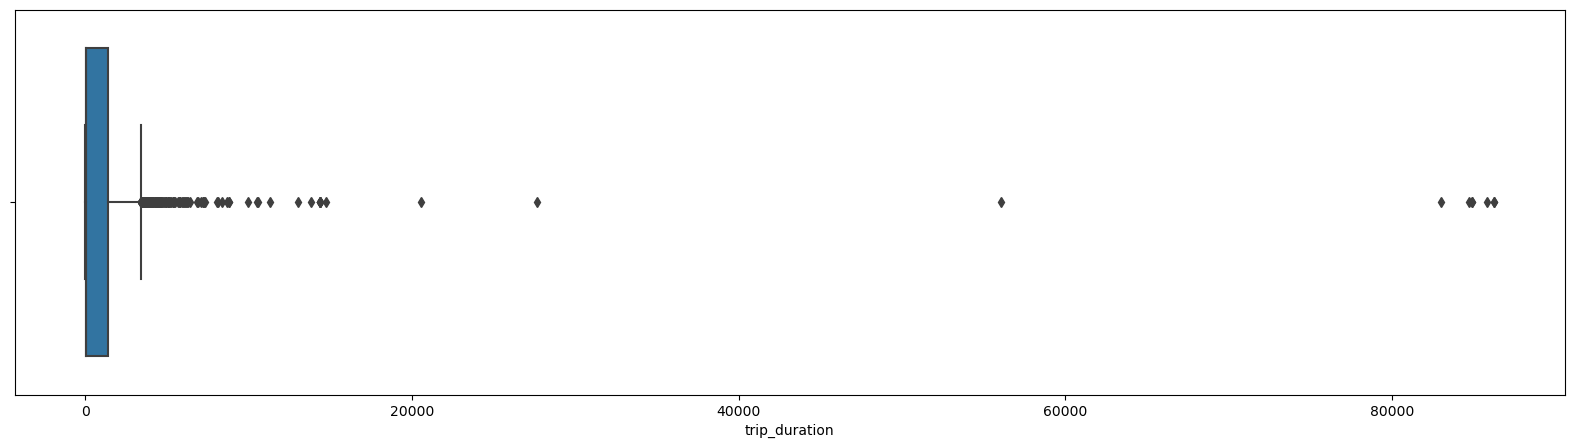

In [172]:
plt.figure(figsize = (20,5))
sns.boxplot(df.trip_duration)
plt.show()

In [173]:
df.trip_duration.describe()

count     2851.000000
mean      1089.566117
std       4587.588793
min          0.000000
25%         13.000000
50%         60.000000
75%       1362.000000
max      86277.000000
Name: trip_duration, dtype: float64

- Some trip durations are over 100000 seconds which are clear outliers and should be removed.
- There are some durations with as low as 1 second. which points towards trips with 0 km distance.
- Major trip durations took between 15-25 mins to complete.


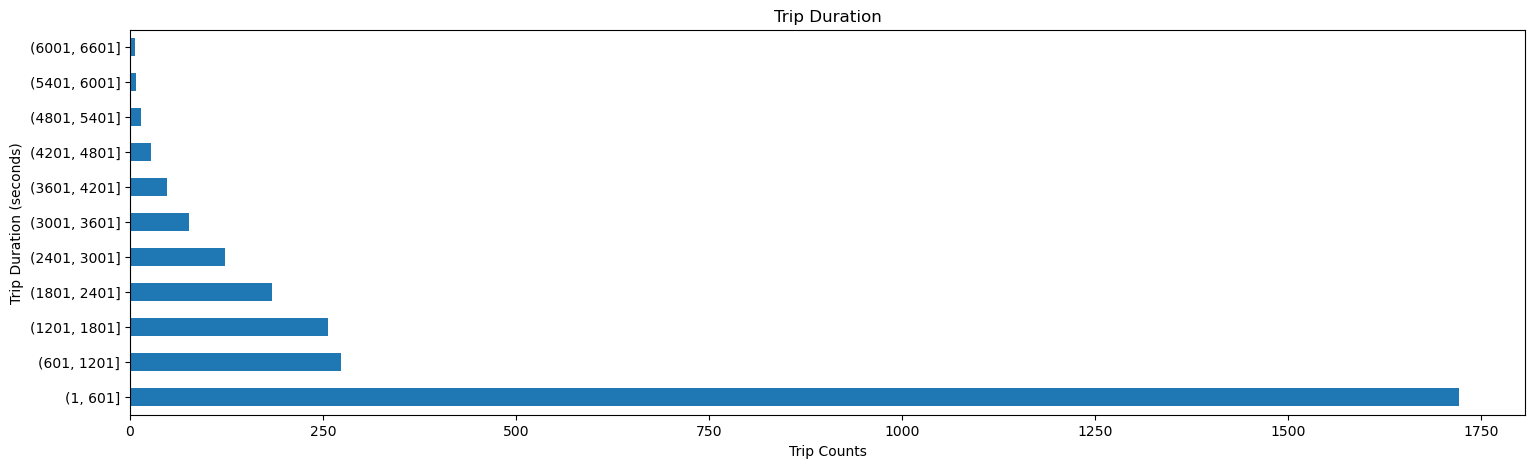

In [101]:
df.trip_duration.groupby(pd.cut(df.trip_duration, np.arange(1,7200,600))).count().plot(kind='barh',figsize = (18,5))
plt.title('Trip Duration')
plt.xlabel('Trip Counts')
plt.ylabel('Trip Duration (seconds)')
plt.show()

- We can observe that most of the trips took 0 - 30 mins to complete i.e. approx 1800 secs.

### Distance

C:\Users\SHAHAMOH\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


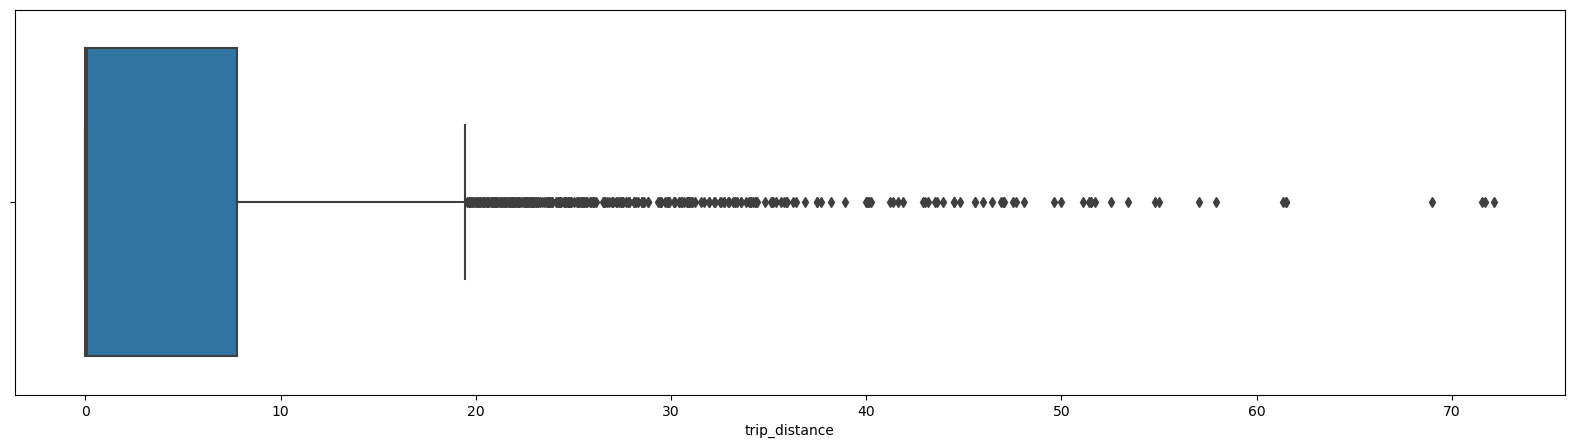

In [103]:
plt.figure(figsize = (20,5))
sns.boxplot(df.trip_distance)
plt.show()

- There some trips with over 60 miles distance.
- Some of the trips distance value is 0 miles.

In [104]:
df.trip_distance.mean()

5.9335847071203185

- mean distance travelled is approx 2.1 miles.

In [105]:
print(f"There are {df.trip_distance[df.trip_distance == 0 ].count()} trip records with 0 miles distance")

There are 1347 trip records with 0 miles distance


#### Around 1.5K trip record with distance equal to 0. Below are some possible explanation for such records.
- Customer changed mind and cancelled the journey just after accepting it.
- Software didn't recorded dropoff location properly due to which dropoff location is the same as the pickup location.
- Issue with GPS tracker while the journey is being finished.
- Driver cancellation before starting the trip

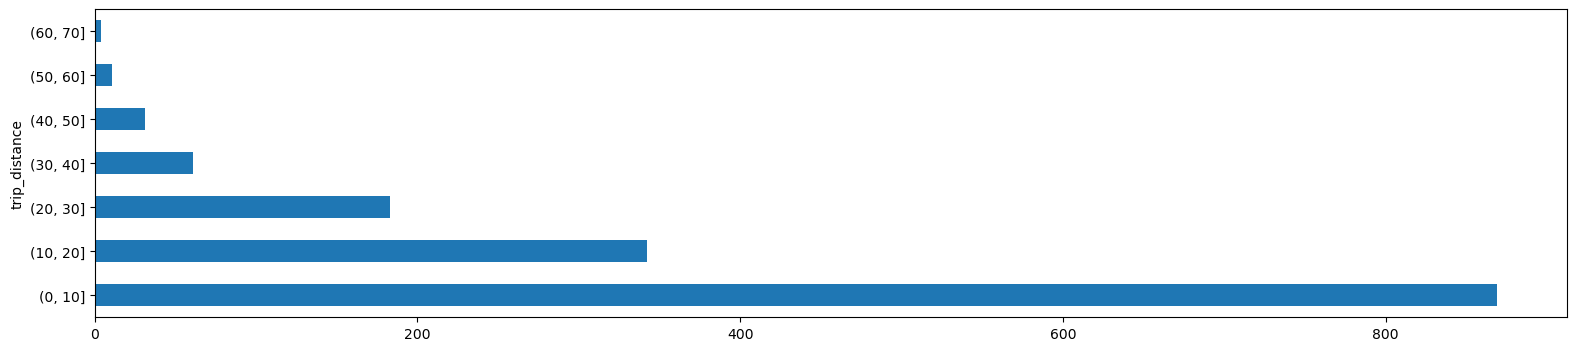

In [106]:
df.trip_distance.groupby(pd.cut(df.trip_distance, np.arange(0,80,10))).count().plot(kind='barh',figsize = (19,4))
plt.show()

- From the above observation it is evident that most of the rides are completed between 1-10 miles and 10-30 miles

- when considering trips above 30 miles as long trip

In [107]:
df_short = df[df.trip_distance <= 30].count()
df_long = df[df.trip_distance > 30].count()
print(f"Short Trips: {df_short[0]} records in total.\nLong Trips: {df_long[0]} records in total.")

Short Trips: 2741 records in total.
Long Trips: 110 records in total.


### Speed

Speed is a function of distance and time. Let's visualize speed in different trips.

- Maximum speed limit in most of the city's  is as follows:

- 25 mph in urban area
- 65 mph on controlled state highways

C:\Users\SHAHAMOH\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


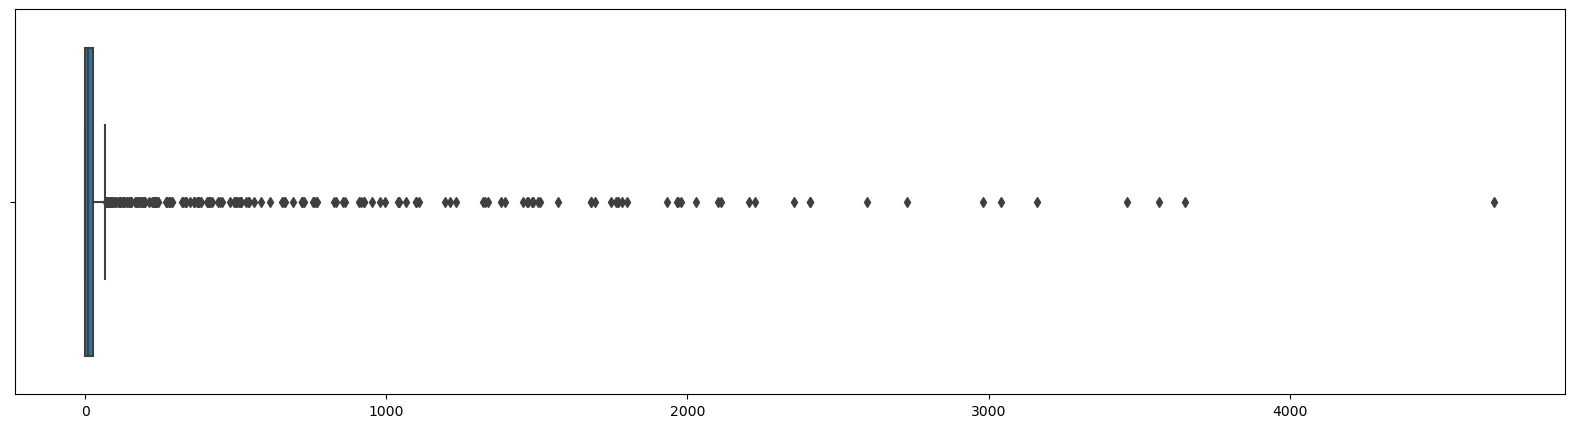

In [110]:
plt.figure(figsize = (20,5))
sns.boxplot(df.average_speed)
plt.show()

Many trips were done at a speed of over 125 mile/h. Going SuperSonic..!!
- Let's remove them and focus on the trips which were done at less than 65 mile/h as per the speed limits

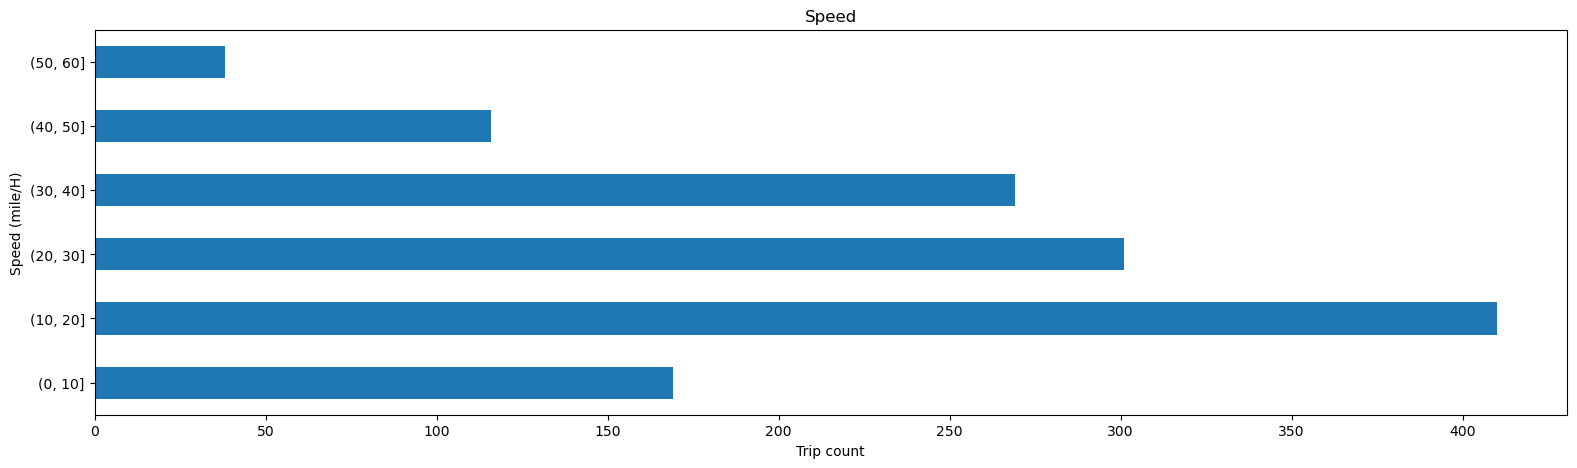

In [112]:
    df = df[df.average_speed <= 65]
    df.average_speed.groupby(pd.cut(df.average_speed, np.arange(0,65,10))).count().plot(kind = 'barh',figsize = (19,5))
    plt.xlabel('Trip count')
    plt.ylabel('Speed (mile/H)')
    plt.title('Speed')
    plt.show()

- Trips over 15 miles/h are being considered as outliers but we cannot ignore them because they are well under the highest speed limit of 65 mile/h on state controlled highways.
- Mostly trips are done at a speed range of 6-12 miles/h with an average speed of around 8 miles/h.

### Total trips Per Hour
- Let's take a look at the distribution of the pickups across the 24 hour time scale.

In [113]:
def clock(ax, radii, title, color):
    N = 24
    bottom = 2

    # create theta for 24 hours
    theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)


    # width of each bin on the plot
    width = (2*np.pi) / N
    
    bars = ax.bar(theta, radii, width=width, bottom=bottom, color=color, edgecolor="#999999")

    # set the lable go clockwise and start from the top
    ax.set_theta_zero_location("N")
    # clockwise
    ax.set_theta_direction(-1)

    # set the label
    ax.set_xticks(theta)
    ticks = ["{}:00".format(x) for x in range(24)]
    ax.set_xticklabels(ticks)
    ax.set_title(title)

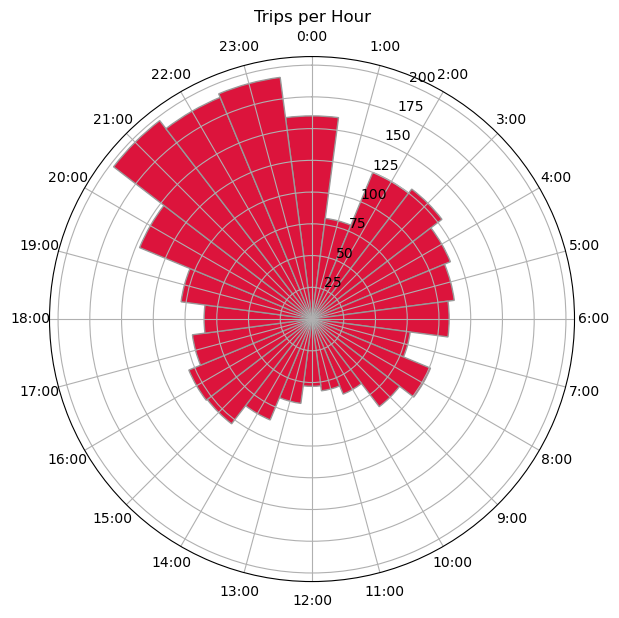

In [114]:
plt.figure(figsize = (15,15))
ax = plt.subplot(2,2,1, polar=True)
    # make the histogram that bined on 24 hour
radii = np.array(df['pickup_hour'].value_counts(sort = False).tolist(), dtype="int64")
# radii = np.array(df['pickup_hour'].value_counts().tolist(), dtype="int64")
title = "Trips per Hour"
clock(ax, radii, title, "#dc143c")

- It's inline with the general trend of taxi pickups which starts increasing from 6AM in the morning and then declines from late evening i.e. around 8 PM. There is no unusual behavior here.
- The number of pickup is maximum at 6-7 pm.

### Total trips per weekday
- Let's take a look now at the distribution of taxi pickups across the week.

C:\Users\SHAHAMOH\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


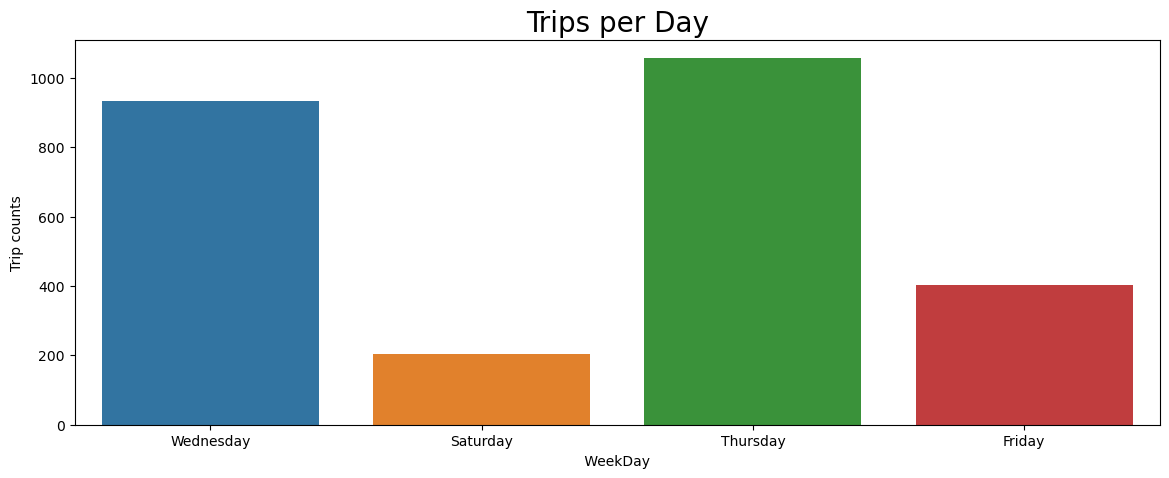

In [120]:
plt.figure(figsize = (14,5))
sns.countplot(df.weekday)
plt.xlabel(' WeekDay ')
plt.ylabel('Trip counts')
plt.title('Trips per Day',fontsize = 20)
plt.show()

In [117]:
df.weekday_num.value_counts()

3    1057
2     932
4     403
5     204
Name: weekday_num, dtype: int64

In [119]:
df.weekday.value_counts()

Thursday     1057
Wednesday     932
Friday        403
Saturday      204
Name: weekday, dtype: int64

- we are missing three days of data (Sunday, MON, TUES)
- general trend here is there is not much pssanger trafic on fridays and saturdays ,The trend starts declining from friday.
- Let's drill down more to see the hourwise pickup pattern across the week

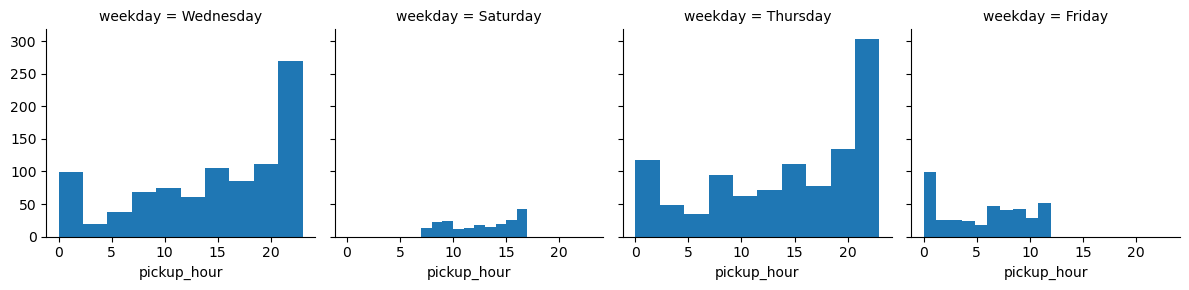

In [122]:
n = sns.FacetGrid(df, col='weekday')
n.map(plt.hist, 'pickup_hour')
plt.show()

- Early morning pickups i.e before 5 AM have increased over the weekend in comparison to the office hours pickups i.e. after 7 AM which have decreased due to obvious reasons.
- Taxi pickups seems to be consistent across wednesday and thursday at 15 Hours i.e. at 3 PM.
- saturdays trend is odd as we only have activity between 7 AM to 4 PM
- Friday also shows activity in earlymorning to noon. 

### Total trips per month
- Let's take a look at the trip distribution across the months to understand if there is any diffrence in the taxi pickups in different months

C:\Users\SHAHAMOH\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


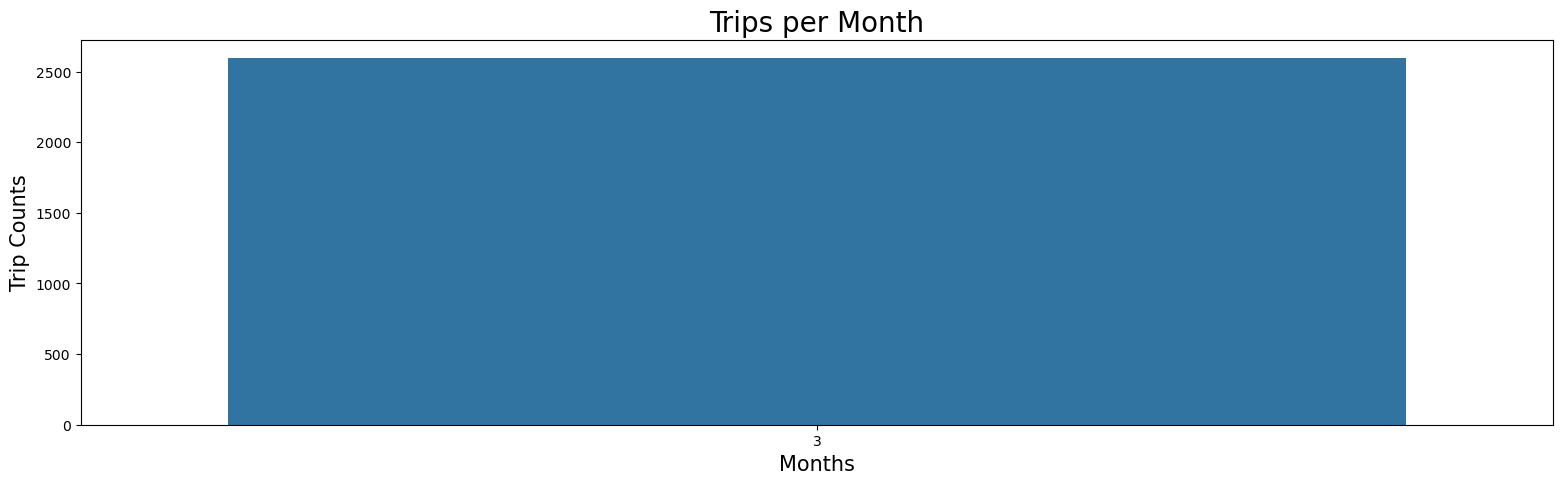

In [123]:
plt.figure(figsize = (19,5))
sns.countplot(df.month)
plt.ylabel('Trip Counts',fontsize = 15)
plt.xlabel('Months',fontsize = 15)
plt.title('Trips per Month',fontsize = 20)
plt.show()

In [124]:
df.month.value_counts()

3    2596
Name: month, dtype: int64

- we cant do a monthly coparison as we have only 3rd month 

### Trip fare

C:\Users\SHAHAMOH\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


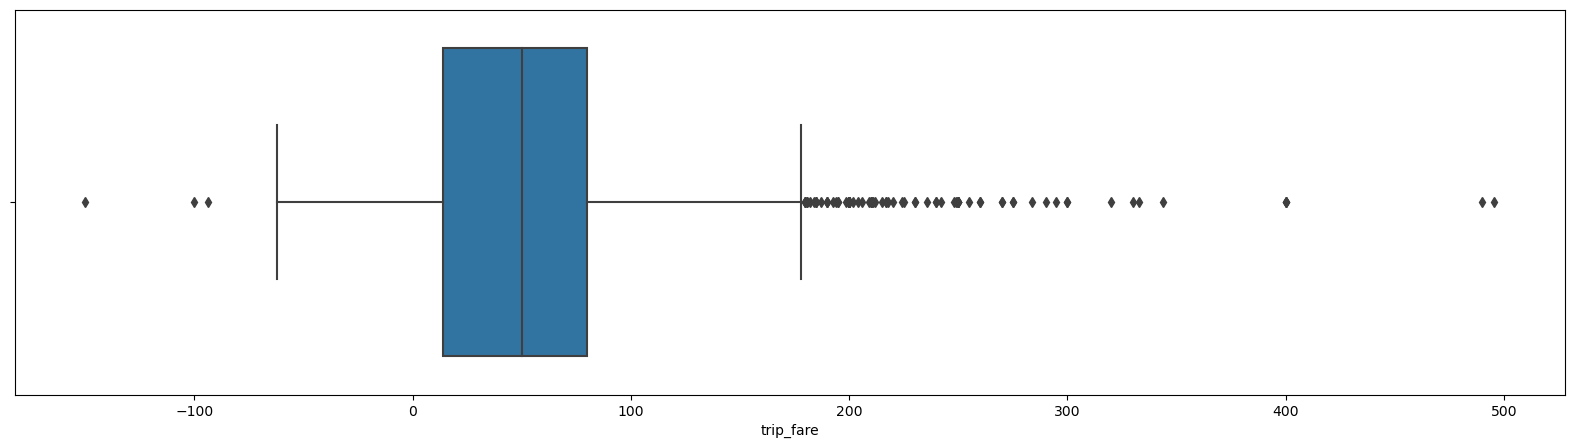

In [174]:
plt.figure(figsize = (20,5))
sns.boxplot(df.trip_fare)
plt.show()

- we can see there are outliers in trip fare as there are fare above 200 to 300

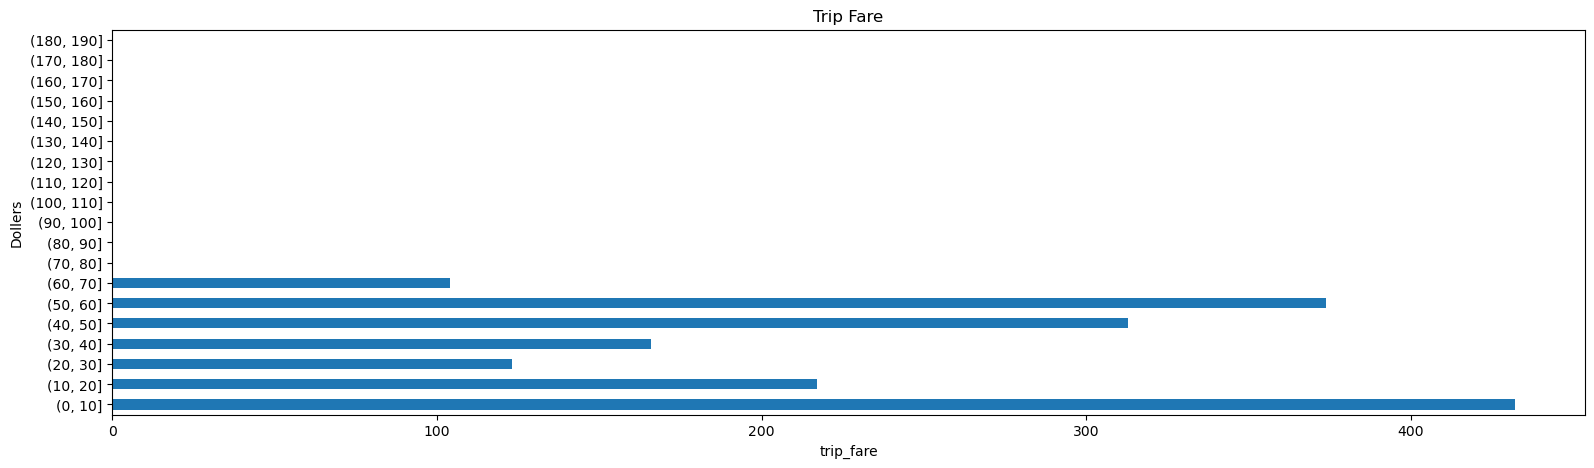

In [181]:
df = df[df.trip_fare <= 200]
df.trip_fare.groupby(pd.cut(df.trip_fare, np.arange(0,200,10))).count().plot(kind = 'barh',figsize = (19,5))
plt.xlabel('trip_fare')
plt.ylabel('Dollers')
plt.title('Trip Fare')
plt.show()

- from above graph it is evident that most of the trips are from 10 to 70 $
- there are more trips in the smallest bucket

### Toll amount

C:\Users\SHAHAMOH\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


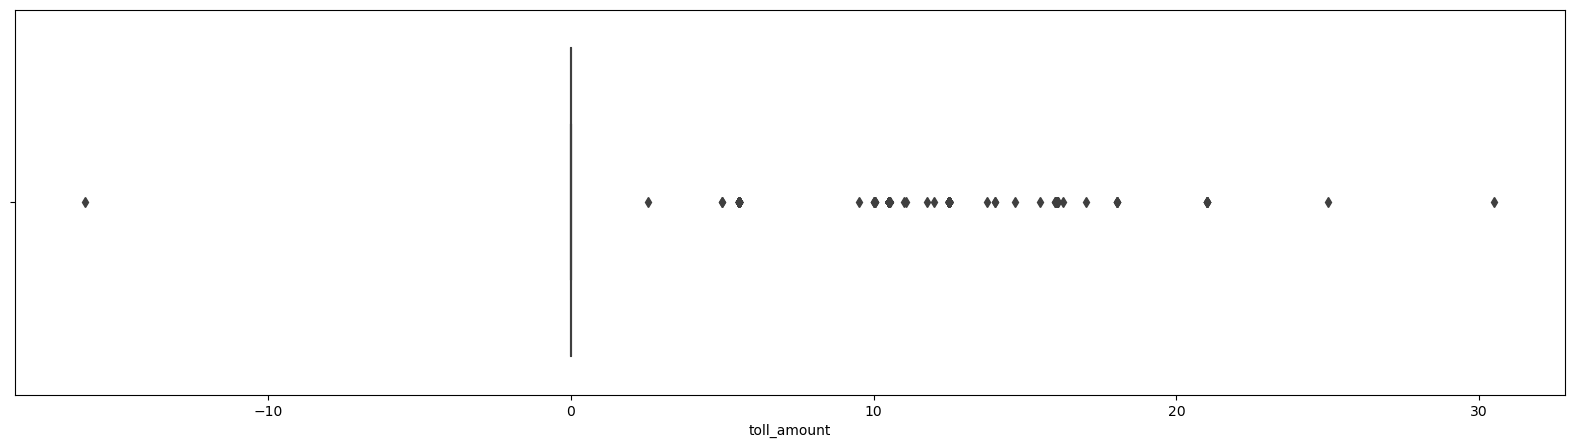

In [177]:
plt.figure(figsize = (20,5))
sns.boxplot(df.toll_amount)
plt.show()

- can see outliers on both side of the box plot

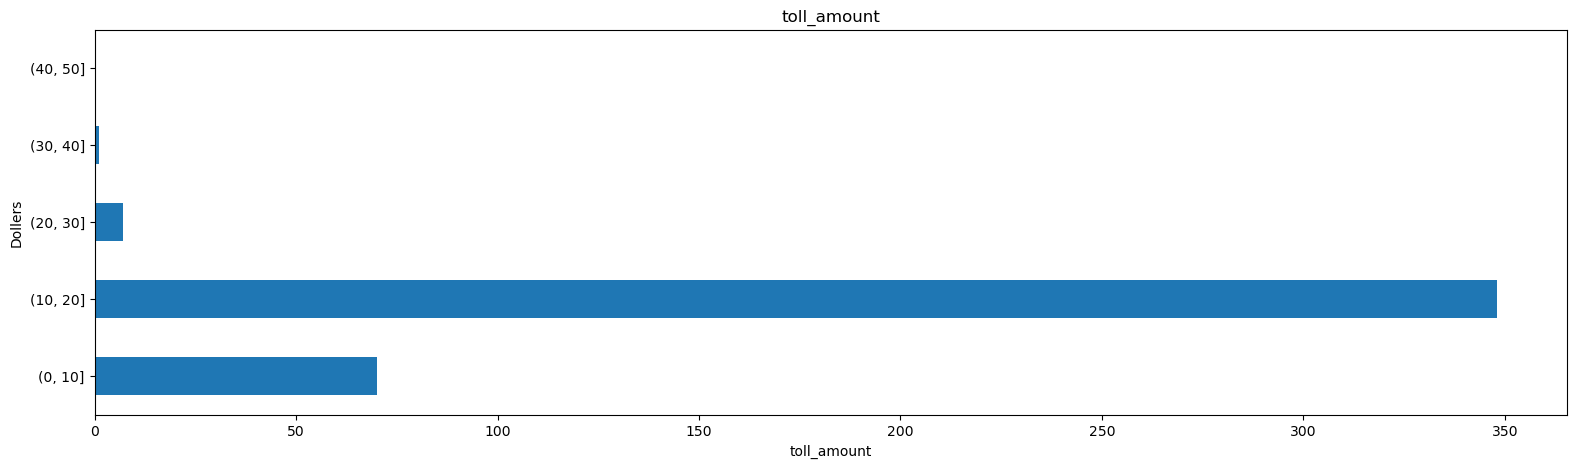

In [182]:
df = df[df.toll_amount <= 60]
df.toll_amount.groupby(pd.cut(df.toll_amount, np.arange(0,60,10))).count().plot(kind = 'barh',figsize = (19,5))
plt.xlabel('toll_amount')
plt.ylabel('Dollers')
plt.title('toll_amount')
plt.show()

- Toll amount averages around 10 to 20 dollars

### Tip amount

C:\Users\SHAHAMOH\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


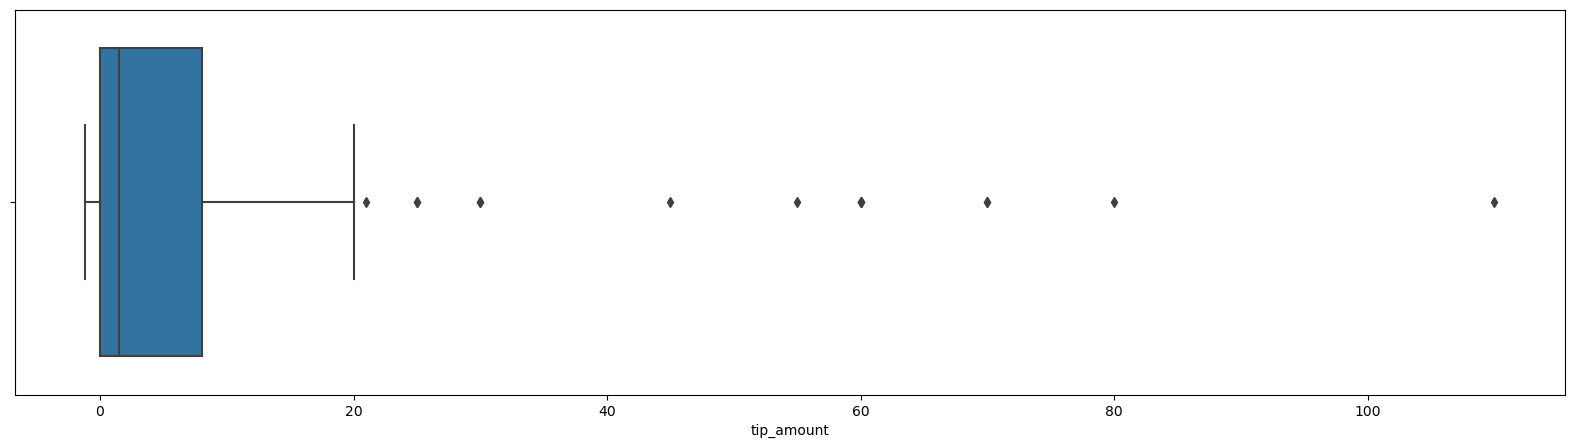

In [179]:
plt.figure(figsize = (20,5))
sns.boxplot(df.tip_amount)
plt.show()

- There are some customers who are very generous and gave above 50 dollars of tip
- tip max's around 20

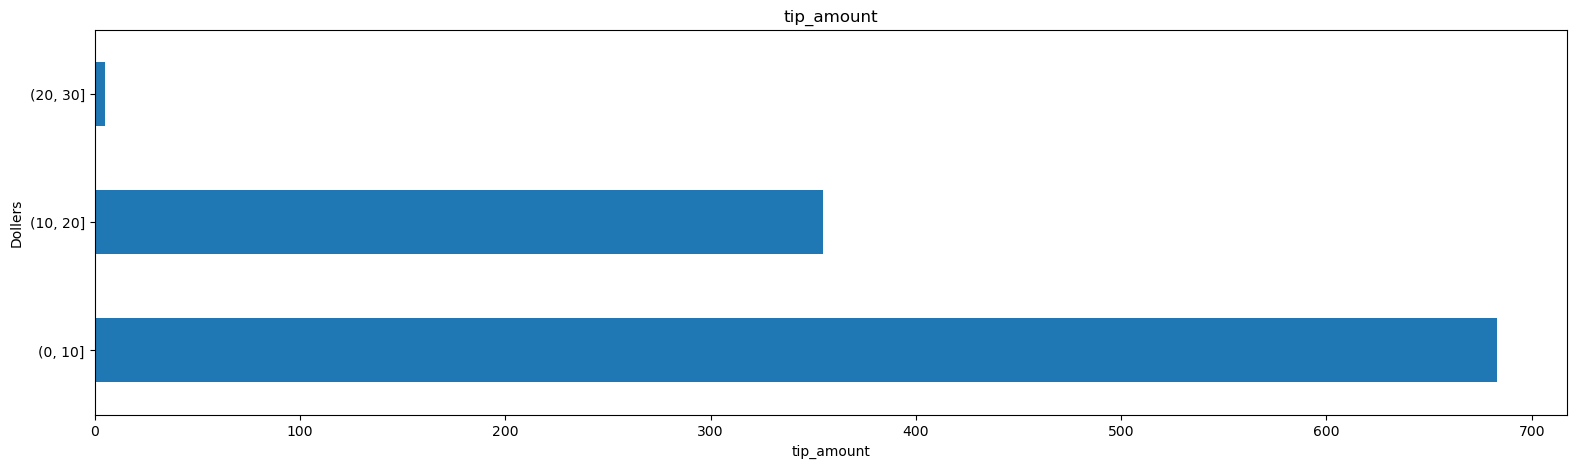

In [185]:
df = df[df.tip_amount <= 40]
df.tip_amount.groupby(pd.cut(df.tip_amount, np.arange(0,40,10))).count().plot(kind = 'barh',figsize = (19,5))
plt.xlabel('tip_amount')
plt.ylabel('Dollers')
plt.title('tip_amount')
plt.show()

- tip amount averages around 10 to 20

## Bivariate Analysis

- Bivariate analysis is used to find out if there is a relationship between two sets of values

### Trip Duration per hour
- We need to aggregate the total trip duration to plot it agaist the month. The aggregation measure can be anything like sum, mean, median or mode for the duration. Since we already did the outlier analysis, so we can take the mean to visualize the pattern which should not result in the bias of the general trend

C:\Users\SHAHAMOH\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


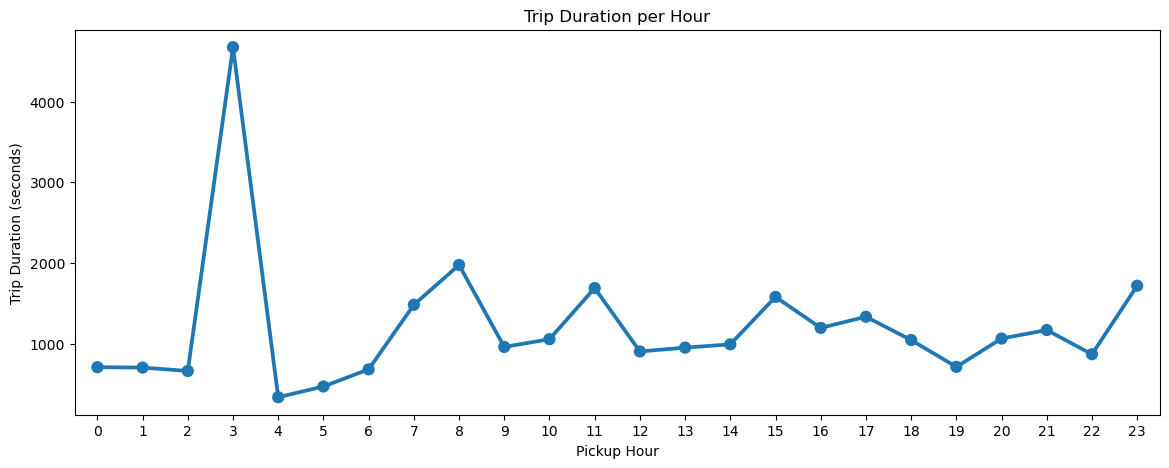

In [126]:
plt.figure(figsize = (14,5))
group1 = df.groupby('pickup_hour').trip_duration.mean()
sns.pointplot(group1.index, group1.values)
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Pickup Hour')
plt.title('Trip Duration per Hour')
plt.show()

- Average trip duration is lowest at 4 AM when there is minimal traffic on the roads.
- Average trip duration is generally highest around 3 AM which is quiet interesting as the lowest just sarts after one hour.


### Trip duration per WeekDay
- Let's now analyze the pattern of trip duration during the week.

C:\Users\SHAHAMOH\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


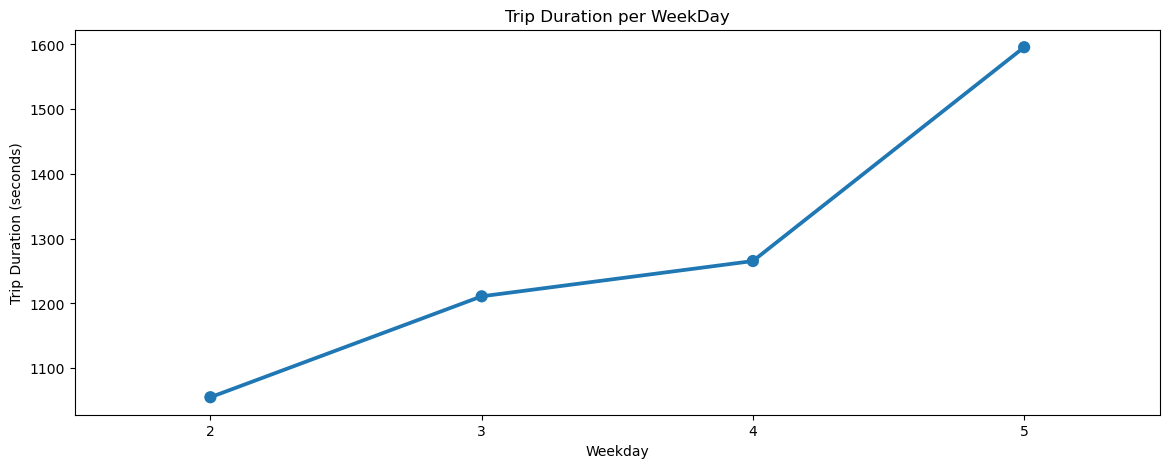

In [129]:
plt.figure(figsize = (14,5))
group2 = df.groupby('weekday_num').trip_duration.mean()
sns.pointplot(group2.index, group2.values)
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Weekday')
plt.title('Trip Duration per WeekDay')
plt.show()

- Trip duration increases as we move towards wekend as people might be moving to their native on friday

### Distance per hour
- Now, let us check how the distance is distributed against different variables. We know that trip distance must be more or less proportional to the trip duration if we ignore general traffic and other stuff on the road. Let's visualize this for each hour now.

- Since we have already done the outlier analysis for this variable as well. We can take the mean as aggregate measure for our visualizations.

C:\Users\SHAHAMOH\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


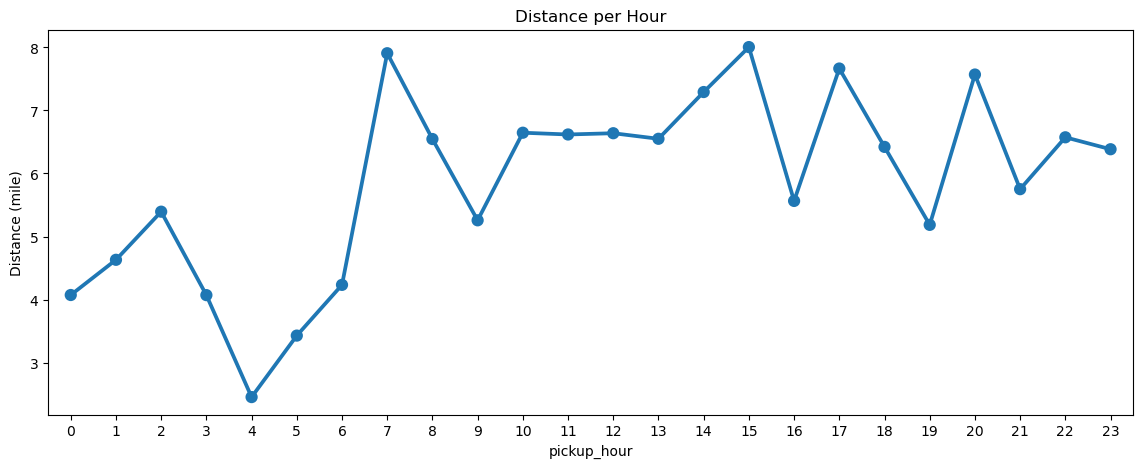

In [134]:
plt.figure(figsize = (14,5))
group5 = df.groupby('pickup_hour').trip_distance.mean()
sns.pointplot(group5.index, group5.values)
plt.ylabel('Distance (mile)')
plt.title('Distance per Hour')
plt.show()

- Trip distance is lowest at 4 AM and duration is also lowest at same time
- Trip distance highest around 3 PM
- Trip distance is high after noon hours

### Distance per WeekDay
- Let's analyze the average trip distance covered on each day of the week.

C:\Users\SHAHAMOH\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


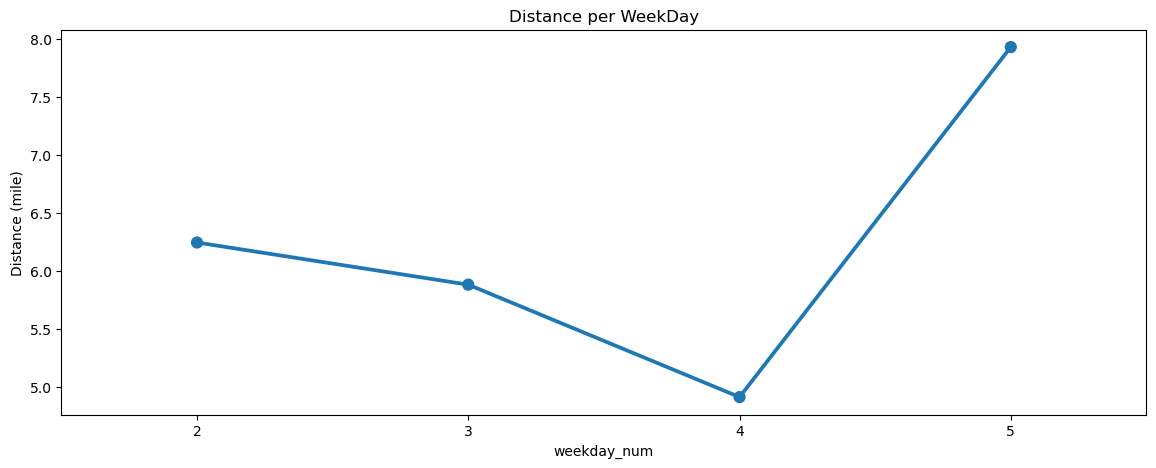

In [136]:
plt.figure(figsize = (14,5))
group6 = df.groupby('weekday_num').trip_distance.mean()
sns.pointplot(group6.index, group6.values)
plt.ylabel('Distance (mile)')
plt.title('Distance per WeekDay')
plt.show()

- trip distance on day 4 is lowest 
- trip distance on day 5 is highst as people are moving out of city or going to their native
- rest of the days averages arounf 6 miles

### Distance v/s Trip duration


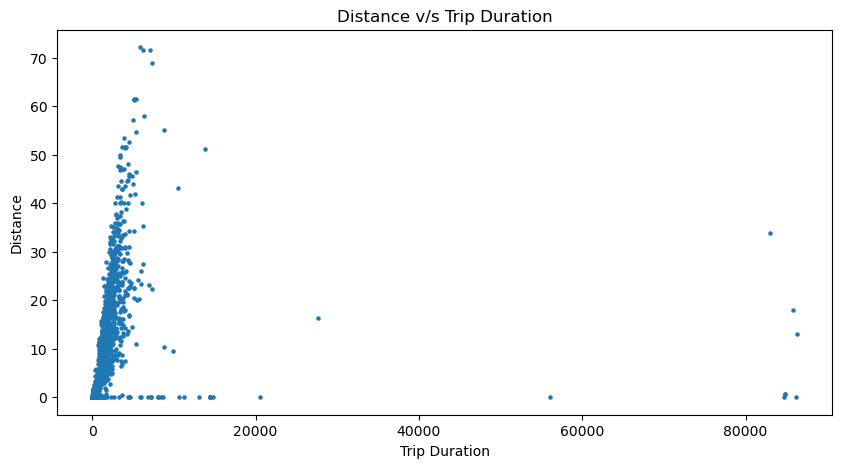

In [140]:
plt.figure(figsize = (10,5))
plt.scatter(df.trip_duration, df.trip_distance , s=5, alpha=1)
plt.ylabel('Distance')
plt.xlabel('Trip Duration')
plt.title('Distance v/s Trip Duration')
plt.show()

- There are lots of trips which covered negligible distance but clocked more than 20,000 seconds in terms of the Duration.
- Initially there is some proper correlation between the distance covered and the trip duration in the graph. but later on it all seems uncorrelated.
- There were few trips which covered huge distance of approx 120 miles within very less time frame, which is unlikely and should be treated as outliers.
- Let's focus on the graph area where distance is < 30 mile and duration is < 1000 seconds.

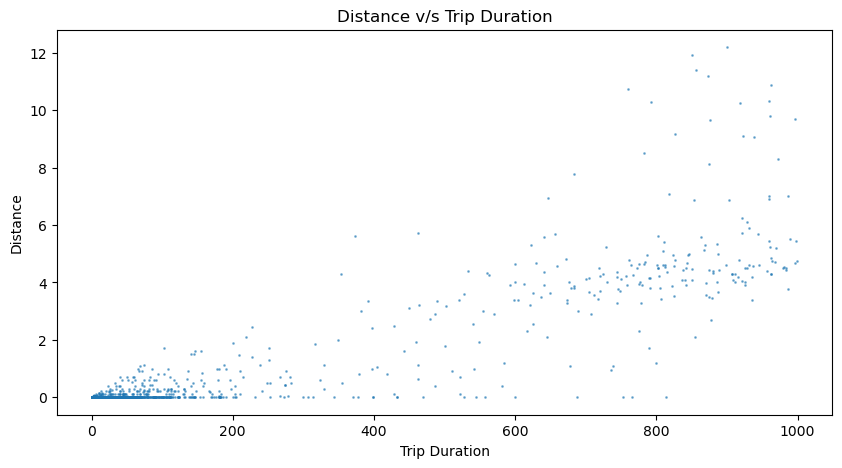

In [143]:
plt.figure(figsize = (10,5))
dur_dist = df.loc[(df.trip_distance < 30) & (df.trip_duration < 1000), ['trip_distance','trip_duration']]
plt.scatter(dur_dist.trip_duration, dur_dist.trip_distance , s=1, alpha=0.5)
plt.ylabel('Distance')
plt.xlabel('Trip Duration')
plt.title('Distance v/s Trip Duration')
plt.show()

- There should have been a linear relationship between the distance covered and trip duration on an average but we can see dense collection of the trips in the lower left corner which showcase many trips with the inconsistent readings.
- We should remove those trips which covered 0 mile distance but clocked more than 1 minute to make our data more consistent for predictive model. Because if the trip was cancelled after booking, than that should not have taken more than a minute time. This is our assumption.

### Average speed per hour

C:\Users\SHAHAMOH\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


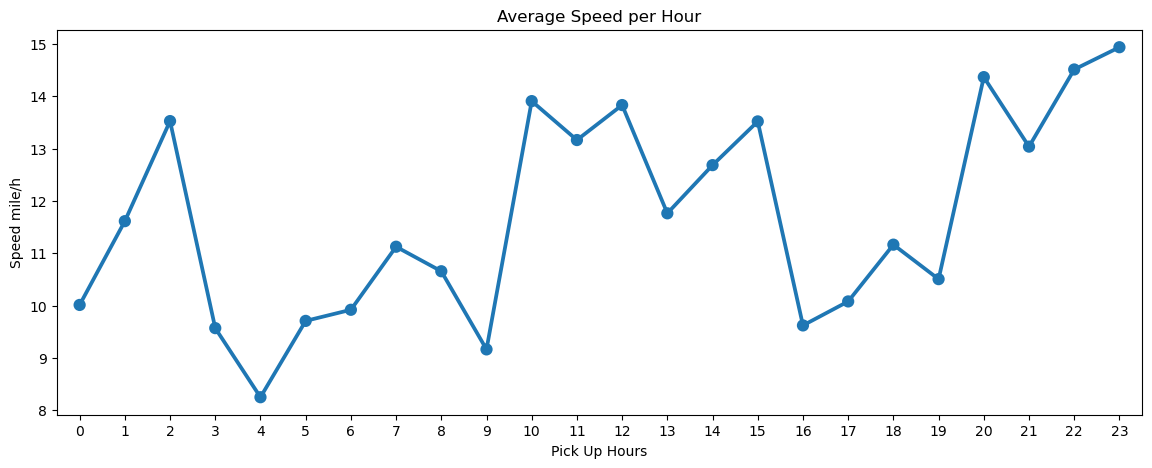

In [145]:
plt.figure(figsize = (14,5))
group9 = df.groupby('pickup_hour').average_speed.mean()
sns.pointplot(group9.index, group9.values)
plt.xlabel('Pick Up Hours')
plt.ylabel('Speed mile/h')
plt.title('Average Speed per Hour')
plt.show()

- Average speed tend to increase after late evening and continues to increase gradually till the late early morning hours.
- Average taxi speed is highest at 11 PM in the midnight, then it declines steeply as the office hours approaches.
- Average taxi speed is more or less same during the office hours i.e. from 8 AM till 6PM in the evening.

#### Average speed per weekday
- Let's visualize that on an average what is the speed of a taxi on any given weekday.

C:\Users\SHAHAMOH\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


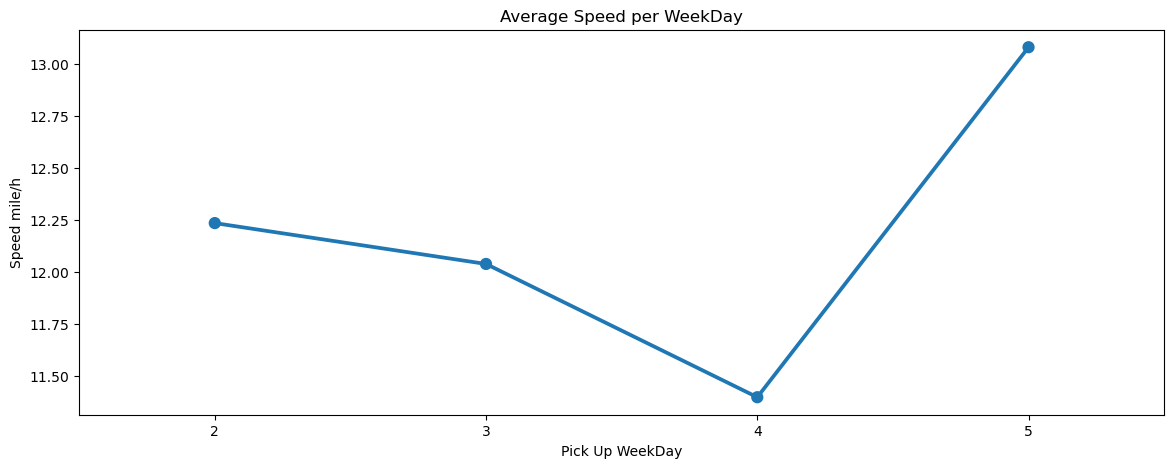

In [147]:
plt.figure(figsize = (14,5))
group10 = df.groupby('weekday_num').average_speed.mean()
sns.pointplot(group10.index, group10.values)
plt.xlabel('Pick Up WeekDay')
plt.ylabel('Speed mile/h')
plt.title('Average Speed per WeekDay')
plt.show()

- Average taxi speed is higher on weekend as compared to the weekdays which is obvious when there is mostly rush of office goers and business owners.

## Trip fare VS Trip distance

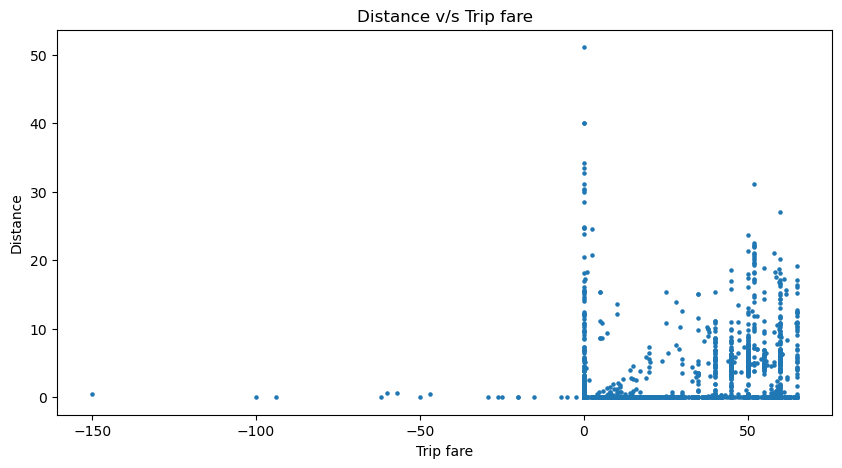

In [187]:
plt.figure(figsize = (10,5))
plt.scatter(df.trip_fare, df.trip_distance , s=5, alpha=1)
plt.ylabel('Distance')
plt.xlabel('Trip fare')
plt.title('Distance v/s Trip fare')
plt.show()

- There are lots of trips which covered negligible distance but had a higher trip fare and vice versa.
- There are -ve fare, which should be checked by the organisation
- There is a positive trend where heigher the distance higher the trip fare, which is expected.


In [194]:
#trip fare zero and trip distance zero (50 count)
df.loc[(df.trip_fare == 0) & (df.trip_distance==0)]

,pickup_time,dropoff_time,trip_distance,pickup_longitude,pickup_latitude,rate_code,dropoff_longitude,dropoff_latitude,payment_type,trip_fare,tip_amount,toll_amount,weekday,month,weekday_num,pickup_hour,trip_duration,average_speed
374,2023-03-01 09:48:11,2023-03-01 09:48:11,0.0,-73.982468,40.744957,1,0.000000,0.000000,2,0.0,0.0,0.00,Wednesday,3,2,9,0.0,NaN
405,2023-03-01 10:36:02,2023-03-01 12:36:02,0.0,-73.962883,40.766590,99,0.000000,0.000000,1,0.0,0.0,0.00,Wednesday,3,2,10,7200.0,0.0
682,2023-03-01 17:24:43,2023-03-01 17:24:43,0.0,-73.983246,40.766518,1,0.000000,0.000000,2,0.0,0.0,0.00,Wednesday,3,2,17,0.0,NaN
725,2023-03-01 17:56:04,2023-03-01 17:56:29,0.0,-73.993423,40.762955,1,-73.993446,40.763016,2,0.0,0.0,0.00,Wednesday,3,2,17,25.0,0.0
739,2023-03-01 18:18:39,2023-03-01 18:18:39,0.0,-73.630035,41.083218,1,0.000000,0.000000,2,0.0,0.0,0.00,Wednesday,3,2,18,0.0,NaN
752,2023-03-01 18:34:52,2023-03-01 18:34:52,0.0,-73.980431,40.759644,1,0.000000,0.000000,2,0.0,0.0,0.00,Wednesday,3,2,18,0.0,NaN
772,2023-03-01 18:48:24,2023-03-01 18:48:24,0.0,-73.962395,40.776466,1,0.000000,0.000000,2,0.0,0.0,0.00,Wednesday,3,2,18,0.0,NaN
782,2023-03-01 19:04:55,2023-03-01 19:04:55,0.0,-73.984589,40.768265,1,0.000000,0.000000,2,0.0,0.0,0.00,Wednesday,3,2,19,0.0,NaN
806,2023-03-01 19:41:13,2023-03-01 19:41:13,0.0,-73.964020,40.756901,99,0.000000,0.000000,2,0.0,0.0,0.00,Wednesday,3,2,19,0.0,NaN
816,2023-03-01 19:50:44,2023-03-01 19:50:44,0.0,-73.957054,40.780392,1,0.000000,0.000000,2,0.0,0.0,0.00,Wednesday,3,2,19,0.0,NaN


In [195]:
#trip distance is zero but there is trip fare
df.loc[(df.trip_fare >0) & (df.trip_distance==0)]

,pickup_time,dropoff_time,trip_distance,pickup_longitude,pickup_latitude,rate_code,dropoff_longitude,dropoff_latitude,payment_type,trip_fare,tip_amount,toll_amount,weekday,month,weekday_num,pickup_hour,trip_duration,average_speed
5,2023-03-04 07:31:00,2023-03-04 09:09:45,0.0,-73.776833,40.646111,1,-73.861954,40.768581,1,45.0,9.10,0.00,Saturday,3,5,7,5925.0,0.0
6,2023-03-04 07:37:06,2023-03-04 07:37:10,0.0,-73.933357,40.798641,1,-73.933365,40.798645,1,16.8,3.00,0.00,Saturday,3,5,7,4.0,0.0
7,2023-03-04 07:39:41,2023-03-04 07:39:43,0.0,0.000000,0.000000,1,-73.973953,40.791351,1,59.5,12.06,0.00,Saturday,3,5,7,2.0,0.0
13,2023-03-04 07:57:25,2023-03-04 07:57:27,0.0,-74.002769,40.730728,1,-74.002769,40.730721,1,11.3,0.00,0.00,Saturday,3,5,7,2.0,0.0
16,2023-03-04 08:03:37,2023-03-04 08:03:40,0.0,0.000000,0.000000,1,-73.970352,40.762192,1,12.5,0.00,0.00,Saturday,3,5,8,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2842,2023-03-03 12:17:28,2023-03-03 12:17:31,0.0,0.000000,0.000000,1,-73.955177,40.770882,1,5.0,0.00,0.00,Friday,3,4,12,3.0,0.0
2844,2023-03-03 12:24:29,2023-03-03 12:24:32,0.0,0.000000,0.000000,1,-73.995178,40.731129,1,9.3,2.02,0.00,Friday,3,4,12,3.0,0.0
2845,2023-03-03 12:25:21,2023-03-03 12:25:21,0.0,-73.984840,40.758900,1,-73.984810,40.758904,1,10.0,2.10,0.00,Friday,3,4,12,0.0,NaN
2847,2023-03-03 12:26:55,2023-03-03 12:27:01,0.0,0.000000,0.000000,1,0.000000,0.000000,1,50.0,7.77,5.54,Friday,3,4,12,6.0,0.0


### Trip fare VS weekday

C:\Users\SHAHAMOH\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


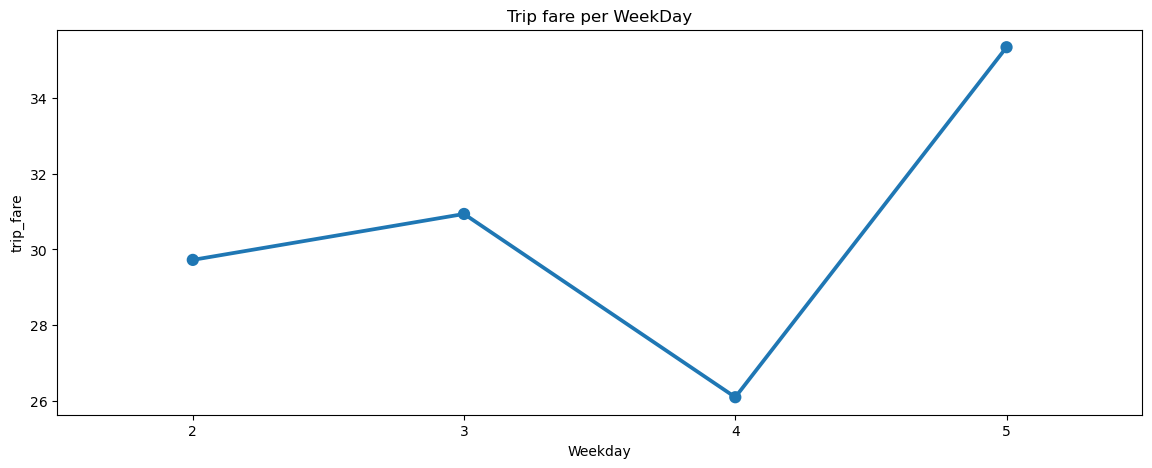

In [191]:
plt.figure(figsize = (14,5))
group2 = df.groupby('weekday_num').trip_fare.mean()
sns.pointplot(group2.index, group2.values)
plt.ylabel('trip_fare')
plt.xlabel('Weekday')
plt.title('Trip fare per WeekDay')
plt.show()

- Trip fare is lower on 4 th weekday
- Trip fare higher on Friday as people are moving out of the city

### Trip fare VS trip duration

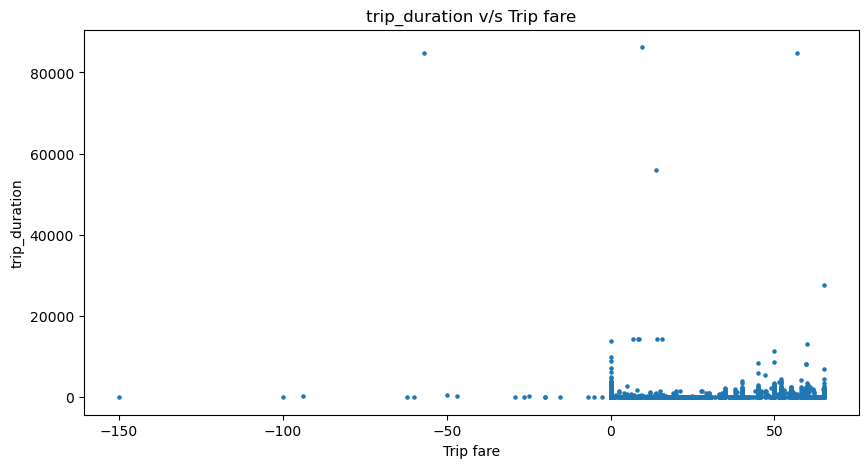

In [189]:
plt.figure(figsize = (10,5))
plt.scatter(df.trip_fare, df.trip_duration , s=5, alpha=1)
plt.ylabel('trip_duration')
plt.xlabel('Trip fare')
plt.title('trip_duration v/s Trip fare')
plt.show()

- we can see in some cases there is trip fare for negligible trip duration
- And trip duration increases as trip fare increases

### Trip fare VS pickup_hour

C:\Users\SHAHAMOH\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


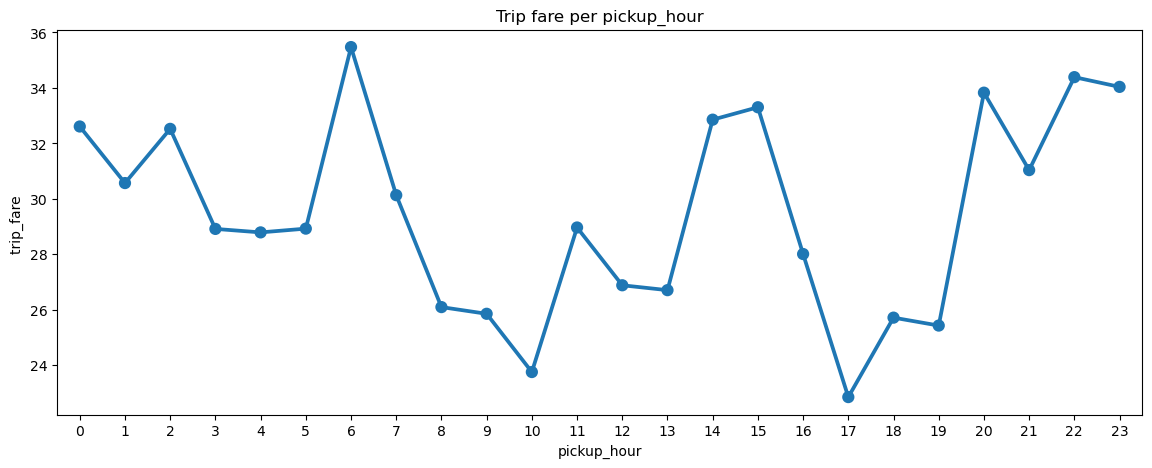

In [190]:
plt.figure(figsize = (14,5))
group2 = df.groupby('pickup_hour').trip_fare.mean()
sns.pointplot(group2.index, group2.values)
plt.ylabel('trip_fare ')
plt.xlabel('pickup_hour')
plt.title('Trip fare per pickup_hour')
plt.show()

- trip fare is lowest arounf 5 PM
- Highest around 6 AM
- Averages around 30 $ most of the time in day

### Trip fare VS tip amount

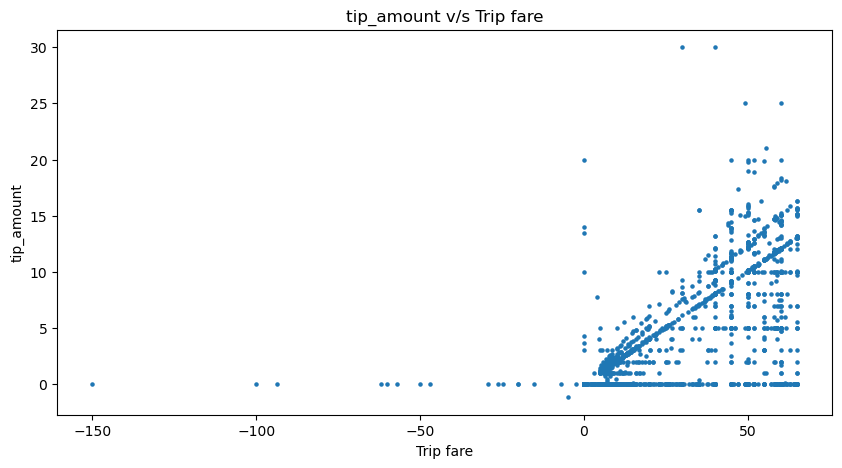

In [192]:
plt.figure(figsize = (10,5))
plt.scatter(df.trip_fare, df.tip_amount , s=5, alpha=1)
plt.ylabel('tip_amount')
plt.xlabel('Trip fare')
plt.title('tip_amount v/s Trip fare')
plt.show()

- trip amount increases as trip fare inscreases
- There are lot of people who didn't gave any tip

# Correlation Analysis
- Correlation analysis is a method of statistical evaluation used to study the strength of a relationship between two or more, numerically measured, continuous variables. This analysis is useful when we need to check if there are possible connections between variables. We will utilize Heatmap for our analysis.

#### Heatmap
- A heatmap is a graphical representation of data that uses a system of color-coding to represent statistical relationship between different values.

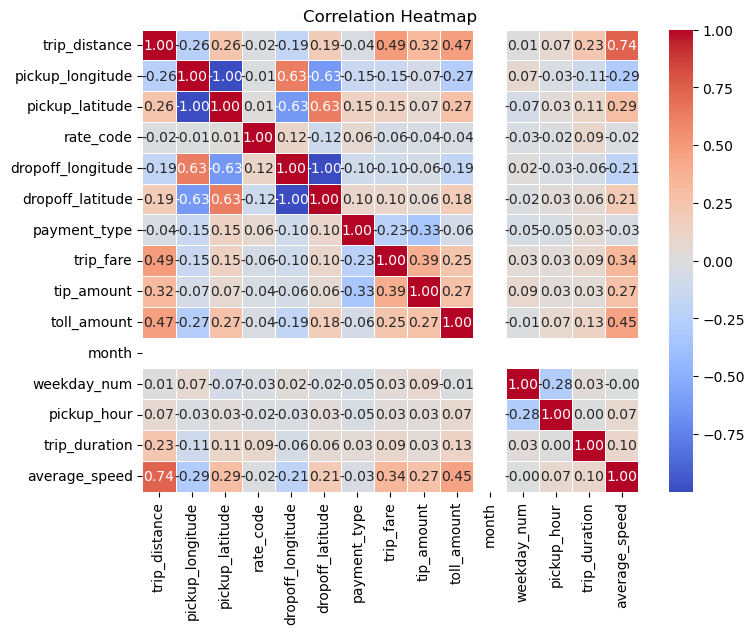

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr(method = 'pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

as expexted
- there is a strong corelation trip distance and average speed.
- also good corelation between trip distance and trip fare, tip amount and toll amount


### Data Cleaning
- As we analysed there is no null value but there are many outliers in Speed, Distance, and Trip Duration.
- This Outliers need to be removed, if not cleaned it can fluctuate the model.